In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\widsdatathon2022\train.csv')

In [10]:
df = df.replace(np.nan,' ',regex=True)

In [11]:
train = df.copy()

In [12]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,,3.899395,4


In [5]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [16]:
train_categorical = [cname for cname in train.columns if train[cname].nunique() < 10 and train[cname].dtype == "object"]
train_numerical   = [cname for cname in train.columns if train[cname].dtype in ['int64','float64']]

In [17]:
X_train_categorical = train[train_categorical]
X_train_numerical   = train[train_numerical]

In [18]:
X_train_categorical.head()

,State_Factor,building_class,direction_peak_wind_speed
0,State_1,Commercial,1.0
1,State_1,Commercial,
2,State_1,Commercial,
3,State_1,Commercial,
4,State_1,Commercial,1.0


In [19]:
X_train_numerical.head()

,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,61242.0,2.4,36,50.5,68,35,50.589286,73,40,...,0,0,0,0,14,0,0,0,248.682615,0
1,1,274000.0,1.8,36,50.5,68,35,50.589286,73,40,...,0,0,0,0,14,0,0,0,26.500150,1
2,1,280025.0,1.8,36,50.5,68,35,50.589286,73,40,...,0,0,0,0,14,0,0,0,24.693619,2
3,1,55325.0,1.8,36,50.5,68,35,50.589286,73,40,...,0,0,0,0,14,0,0,0,48.406926,3
4,1,66000.0,2.4,36,50.5,68,35,50.589286,73,40,...,0,0,0,0,14,0,0,0,3.899395,4


<AxesSubplot:>

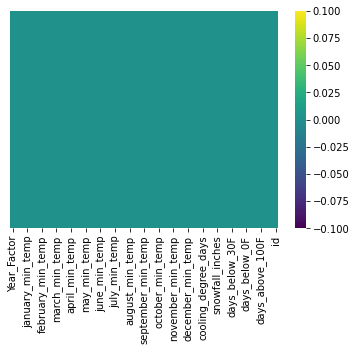

In [20]:
sns.heatmap(X_train_numerical.isnull(),yticklabels=False,cmap='viridis')

In [21]:
X_train_numerical.columns

Index(['Year_Factor', 'floor_area', 'ELEVATION', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_1

In [23]:
X_train_categorical = X_train_categorical.drop('direction_peak_wind_speed',axis=1)

In [24]:
X_train_categorical.head()

,State_Factor,building_class
0,State_1,Commercial
1,State_1,Commercial
2,State_1,Commercial
3,State_1,Commercial
4,State_1,Commercial


In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [26]:
encoded_train_categorical = pd.DataFrame(ordinal_encoder.fit_transform(X_train_categorical))

In [27]:
encoded_train_categorical.columns = X_train_categorical.columns

In [28]:
encoded_train_categorical.head()

,State_Factor,building_class
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [29]:
train_set = pd.concat([encoded_train_categorical,X_train_numerical],axis=1)

In [30]:
train_set.head()

,State_Factor,building_class,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,0.0,0.0,1,61242.0,2.4,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,248.682615,0
1,0.0,0.0,1,274000.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,26.500150,1
2,0.0,0.0,1,280025.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,24.693619,2
3,0.0,0.0,1,55325.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,48.406926,3
4,0.0,0.0,1,66000.0,2.4,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,3.899395,4


In [32]:
train_set.isnull().sum()

State_Factor            0
building_class          0
Year_Factor             0
floor_area              0
ELEVATION               0
january_min_temp        0
january_avg_temp        0
january_max_temp        0
february_min_temp       0
february_avg_temp       0
february_max_temp       0
march_min_temp          0
march_avg_temp          0
march_max_temp          0
april_min_temp          0
april_avg_temp          0
april_max_temp          0
may_min_temp            0
may_avg_temp            0
may_max_temp            0
june_min_temp           0
june_avg_temp           0
june_max_temp           0
july_min_temp           0
july_avg_temp           0
july_max_temp           0
august_min_temp         0
august_avg_temp         0
august_max_temp         0
september_min_temp      0
september_avg_temp      0
september_max_temp      0
october_min_temp        0
october_avg_temp        0
october_max_temp        0
november_min_temp       0
november_avg_temp       0
november_max_temp       0
december_min

In [33]:
df1 = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\widsdatathon2022\test.csv')

In [36]:
df1.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,,,,,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,,,,,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,,,,,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,,,,,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [35]:
df1 = df1.replace(np.nan,' ',regex=True)

In [40]:
test_categorical = [cname for cname in df1.columns if df1[cname].nunique() < 10 and df1[cname].dtype == "object"]
test_numerical   = [cname for cname in df1.columns if df1[cname].dtype in ['int64','float64']]

In [41]:
test_categorical = df1[test_categorical]
test_numerical   = df1[test_numerical]

In [46]:
test_categorical.head()

,State_Factor,building_class
0,State_1,Commercial
1,State_1,Commercial
2,State_1,Commercial
3,State_1,Commercial
4,State_1,Commercial


In [45]:
test_categorical = test_categorical.drop(['direction_max_wind_speed','direction_peak_wind_speed','days_with_fog'],axis=1)

In [47]:
encoded_test_categorical = pd.DataFrame(ordinal_encoder.transform(test_categorical))

In [48]:
encoded_test_categorical.columns = test_categorical.columns

In [49]:
encoded_test_categorical.head()

,State_Factor,building_class
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [50]:
test_numerical.head()

,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id
0,7,28484.0,2.4,38,50.596774,64,40,54.482143,66,42,...,59.894521,0,0,0,0,29,5,2,0,75757
1,7,21906.0,45.7,38,50.596774,64,40,54.482143,66,42,...,59.894521,0,0,0,0,29,5,2,0,75758
2,7,16138.0,59.1,38,50.596774,64,40,54.482143,66,42,...,59.894521,0,0,0,0,29,5,2,0,75759
3,7,97422.0,35.4,38,50.596774,64,40,54.482143,66,42,...,59.894521,0,0,0,0,29,5,2,0,75760
4,7,61242.0,1.8,38,50.596774,64,40,54.482143,66,42,...,59.894521,0,0,0,0,29,5,2,0,75761


<AxesSubplot:>

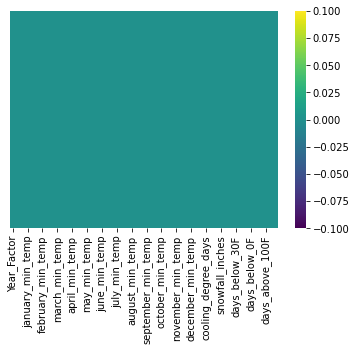

In [51]:
sns.heatmap(test_numerical.isnull(),yticklabels=False,cmap='viridis')

In [52]:
test_set = pd.concat([encoded_test_categorical,test_numerical],axis=1)

In [53]:
test_set.head()

,State_Factor,building_class,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id
0,0.0,0.0,7,28484.0,2.4,38,50.596774,64,40,54.482143,...,59.894521,0,0,0,0,29,5,2,0,75757
1,0.0,0.0,7,21906.0,45.7,38,50.596774,64,40,54.482143,...,59.894521,0,0,0,0,29,5,2,0,75758
2,0.0,0.0,7,16138.0,59.1,38,50.596774,64,40,54.482143,...,59.894521,0,0,0,0,29,5,2,0,75759
3,0.0,0.0,7,97422.0,35.4,38,50.596774,64,40,54.482143,...,59.894521,0,0,0,0,29,5,2,0,75760
4,0.0,0.0,7,61242.0,1.8,38,50.596774,64,40,54.482143,...,59.894521,0,0,0,0,29,5,2,0,75761


In [54]:
train_set.head()

,State_Factor,building_class,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,0.0,0.0,1,61242.0,2.4,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,248.682615,0
1,0.0,0.0,1,274000.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,26.500150,1
2,0.0,0.0,1,280025.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,24.693619,2
3,0.0,0.0,1,55325.0,1.8,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,48.406926,3
4,0.0,0.0,1,66000.0,2.4,36,50.5,68,35,50.589286,...,0,0,0,0,14,0,0,0,3.899395,4


In [55]:
train_set = train_set.drop('id',axis=1)
test_set  = test_set.drop('id',axis=1)

In [56]:
X = train_set.drop('site_eui',axis=1)
y = train_set['site_eui']

In [57]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X,y)

LinearRegression()

In [58]:
pred1 = model1.predict(test_set)

In [59]:
df2 = pd.read_csv(r'C:\Users\Lenovo\Documents\KAGGLE\widsdatathon2022\test.csv')

In [60]:
submission = pd.DataFrame({
    "id" : df2['id'],
    "site_eui" :   pred1
})

In [61]:
submission.to_csv('Energy_v01.csv', index=False)

In [62]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X,y)

DecisionTreeRegressor()

In [63]:
pred2 = model2.predict(test_set)

In [64]:
submission = pd.DataFrame({
    "id" : df2['id'],
    "site_eui" :   pred2
})

In [65]:
submission.to_csv('Energy_v02.csv', index=False)